In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer


In [2]:
df = pd.read_csv('spambase.data', header=None)
print(df.head())

     0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


Detalhes: algumas colunas, a exemplo 55 e 56, possuem valores em um range desproporcional ao range das demais colunas. Corrigiremos este problema utilizando uma normalização dos valores 

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [4]:
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78


Normalização

In [5]:
normalizer = Normalizer()
X = normalizer.fit_transform(X)
X = pd.DataFrame(X)


In [6]:
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.000000,0.002248,0.002248,0.0,0.001124,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.002733,0.000000,0.000000,0.013195,0.214296,0.976627
1,0.000203,0.000271,0.000484,0.0,0.000136,0.000271,0.000203,0.000068,0.000000,0.000910,...,0.0,0.000000,0.000128,0.0,0.000360,0.000174,0.000046,0.004951,0.097776,0.995188
2,0.000026,0.000000,0.000307,0.0,0.000532,0.000082,0.000082,0.000052,0.000277,0.000108,...,0.0,0.000004,0.000062,0.0,0.000119,0.000080,0.000004,0.004251,0.209911,0.977710
3,0.000000,0.000000,0.000000,0.0,0.003227,0.000000,0.001588,0.003227,0.001588,0.003227,...,0.0,0.000000,0.000702,0.0,0.000702,0.000000,0.000000,0.018119,0.204911,0.978452
4,0.000000,0.000000,0.000000,0.0,0.003227,0.000000,0.001588,0.003227,0.001588,0.003227,...,0.0,0.000000,0.000692,0.0,0.000692,0.000000,0.000000,0.018119,0.204911,0.978452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.003519,0.000000,0.007039,0.0,0.000000,0.003519,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.002634,0.0,0.000000,0.000000,0.000000,0.012965,0.034058,0.999024
4597,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.021954,0.000000,0.000000,0.096708,0.248768,0.870687
4598,0.002538,0.000000,0.002538,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000863,0.006075,0.0,0.000000,0.000000,0.000000,0.011878,0.050763,0.998331
4599,0.012276,0.000000,0.000000,0.0,0.004092,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000729,0.0,0.000000,0.000000,0.000000,0.014667,0.063937,0.997423


Divisão em Treinamento, Validação e Teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42, stratify=y_train)


Primeiro passo: usar o conjunto de validação para encontrar os hiperparâmetros ideais


In [8]:
scoring = ['precision', 'recall', 'f1']
train_scores_precision,train_scores_recall, train_scores_f1, media_geral = [], [],[], []

k_range = np.arange(1,10,1)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train, y_train, scoring=scoring)
    train_scores_precision.append(scores['test_precision'].mean())
    train_scores_recall.append(scores['test_recall'].mean())
    train_scores_f1.append(scores['test_f1'].mean())
    media_geral.append((scores['test_precision'].mean() + scores['test_recall'].mean() + scores['test_f1'].mean())/3)
    knn.fit(X_train, y_train)
    
    print('K =', k)
    print(knn.score(X_val,y_val))
    print('Precision:', scores['test_precision'].mean())
    print('Recall:', scores['test_recall'].mean())
    print('F1:', scores['test_f1'].mean())
    print('Média geral:', (scores['test_precision'].mean() + scores['test_recall'].mean() + scores['test_f1'].mean())/3)
    print('\n')

K = 1
0.8561076604554866
Precision: 0.7513142114111724
Recall: 0.8311369262997523
F1: 0.7889135159984111
Média geral: 0.7904548845697786


K = 2
0.8240165631469979
Precision: 0.8145614740734596
Recall: 0.7072303688186377
F1: 0.7569463485927572
Média geral: 0.7595793971616182


K = 3
0.8436853002070394
Precision: 0.714394384085995
Recall: 0.844632768361582
F1: 0.7739144282366336
Média geral: 0.7776471935614034


K = 4
0.8343685300207039
Precision: 0.7619354509493771
Recall: 0.7781819335999492
F1: 0.7696899325232128
Média geral: 0.769935772357513


K = 5
0.8374741200828157
Precision: 0.7068914051478324
Recall: 0.867123722465562
F1: 0.7787800471619777
Média geral: 0.7842650582584575


K = 6
0.8281573498964804
Precision: 0.7445177306861929
Recall: 0.8187202437630928
F1: 0.7796349926908007
Média geral: 0.7809576557133622


K = 7
0.8354037267080745
Precision: 0.6896362440919097
Recall: 0.8761315305021267
F1: 0.77157096458389
Média geral: 0.7791129130593087


K = 8
0.8291925465838509
Precisio

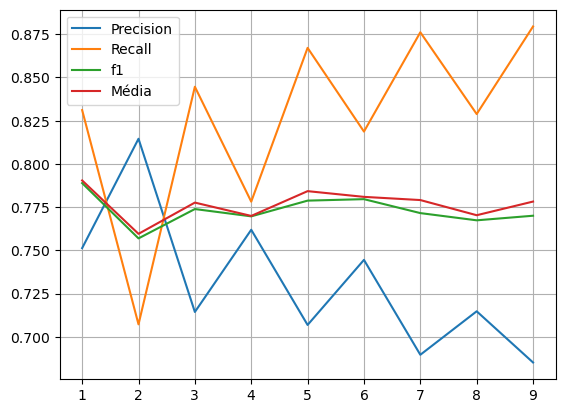

In [9]:
plt.plot(k_range, train_scores_precision, label="Precision")
plt.plot(k_range, train_scores_recall,label="Recall")
plt.plot(k_range, train_scores_f1, label="f1")
plt.plot(k_range, media_geral, label="Média")
plt.legend()
plt.grid()
plt.show()

Encontramos uma média geral maior para o valor de k = 3

Para cada metrica de avaliação, plot a curva de aprendizagem para os
classificadores com a melhor configuração de hiper-parametros. Mais
precisamente, considere conjuntos de treinamento e teste de (5%, 95%) a
(95%, 5%) do conjunto original de treinamento, com passo de 5% (usando
amostragem estratificada). Para cada par de conjuntos de treinamento e teste,
compute as metricas de avaliação. Comente.

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
test_size = np.arange(0.95, 0.049, -0.05)
lista_precision, lista_recall, lista_f1, lista_acc = [],[],[],[]

for div in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=div, random_state=42, stratify=y)
    knn.fit(X_train, y_train)
    scores = cross_validate(knn, X_test, y_test, scoring=scoring)
    lista_acc.append(knn.score(X_test,y_test))
    lista_precision.append(scores['test_precision'].mean())
    lista_recall.append(scores['test_recall'].mean())
    lista_f1.append(scores['test_f1'].mean())

print("Accuracy:", lista_acc)
print('Precision:', lista_precision)
print('Recall:', lista_recall)
print('F1:', lista_f1)

Accuracy: [0.7318691374971402, 0.7565805361023907, 0.7752492968550243, 0.7889160554197229, 0.7922341350333236, 0.8000620925178517, 0.8104312938816449, 0.8178196305686346, 0.8154879494271039, 0.8152976966536288, 0.8136166103331723, 0.8267246061922868, 0.8330229671011794, 0.8421433743664012, 0.8479582971329279, 0.8523344191096635, 0.8654124457308249, 0.8698481561822126, 0.8571428571428571]
Precision: [0.7782656426764899, 0.7590714289705296, 0.7663091605506299, 0.7609836471668732, 0.7489452273251367, 0.7461231122026686, 0.743749157748094, 0.7414053984672855, 0.7356735189161926, 0.7275791581703561, 0.7168863171506361, 0.7158179755130784, 0.7171941159137452, 0.6963536771830269, 0.677466197009031, 0.6618026942115997, 0.6669191440098501, 0.6677446822183664, 0.5949055775142731]
Recall: [0.8676070104482643, 0.8517082231102606, 0.8630836800739713, 0.8593103448275862, 0.8610294117647059, 0.8503003330117332, 0.856657050126217, 0.8354669597936837, 0.8194371859296481, 0.8235929816040313, 0.819856351

In [11]:
lista_media_geral = [(lista_acc[i]+lista_f1[i]+lista_precision[i]+lista_recall[i])/4 for i in range(len(lista_acc))]

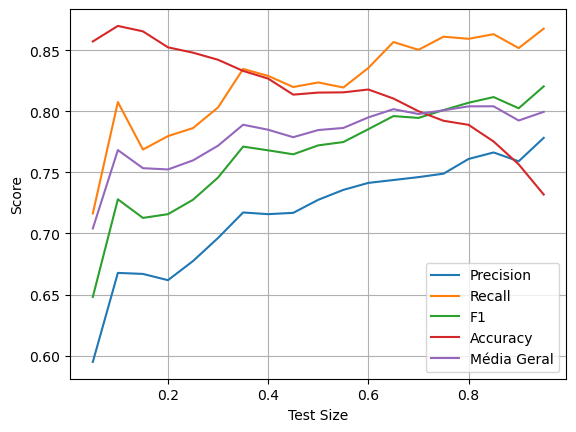

In [12]:
plt.plot(test_size, lista_precision, label='Precision')
plt.plot(test_size, lista_recall, label='Recall')
plt.plot(test_size, lista_f1, label='F1')
plt.plot(test_size, lista_acc, label='Accuracy')
plt.plot(test_size, lista_media_geral, label="Média Geral")
plt.legend()
plt.grid()
plt.xlabel('Test Size')
plt.ylabel('Score')
plt.show()